Data Storytelling: In this exercise, you will make like your great data storyteller forebears and tell a
compelling story about a dataset of interest to you. You can pick any dataset at all, but
we’ve also provided a few below to spark your imagination. Keep in mind that
storytelling is an art, so you have to get your creative juices bubbling. 

The dataset I chose is the same as my Capstone 2 project - wineQuality.csv. It's already clean and I'm already familiar with it. The story I'd like to focus on is this... which wine is considered higher quality - red or white?


In [1]:
#Import packages:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.datasets import make_classification

#import data
importedData ='wineQuality.csv'
df = pd.read_csv(importedData)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [2]:
# split quality into hi/lo >=7
conditions = [df['quality'] >= 7, df['quality'] < 7,]
outputs = ['1', '0']
df['qual_bin'] = pd.to_numeric(np.select(conditions, outputs))
df.sort_values(by='quality', ascending=False).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,qual_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [31]:
df.sort_values(by='quality', ascending=False).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,qual_bin,percent
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white,1,0
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white,1,0
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white,1,0
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white,1,0
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white,1,0


In [50]:
white_wine = df.loc[df["type"] == 'white']
red_wine = df.loc[df["type"] == 'red']

In [57]:
white_hiQual = white_wine.loc[white_wine["qual_bin"] == 1]
red_hiQual = red_wine.loc[red_wine["qual_bin"] == 1]

In [61]:
white_hiQual.quality.mean()

7.1745283018867925

In [62]:
red_hiQual.quality.mean()

7.082949308755761

White wines are considered slightly higher quality using just the mean. 

In [67]:
#calc %
white_perc_hi = (white_hiQual.type.count() / white_wine.type.count()) * 100
red_perc_hi = (red_hiQual.type.count() / red_wine.type.count()) * 100

13.570981863664791

In [68]:
print('White % is: ', white_perc_hi)
print('Red % is: ', red_perc_hi)

White % is:  21.641486320947326
Red % is:  13.570981863664791


It looks like the Whites have it! Next steps might be to consider the other features in figuring out the why. 
We can start with histograms of both the white and red sets.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ACE3408FD0>,
      dtype=object)

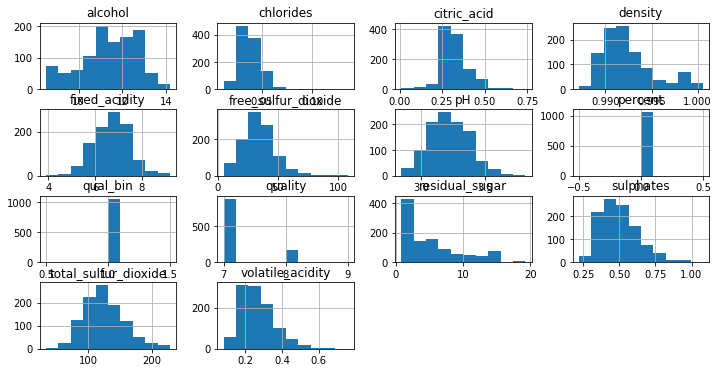

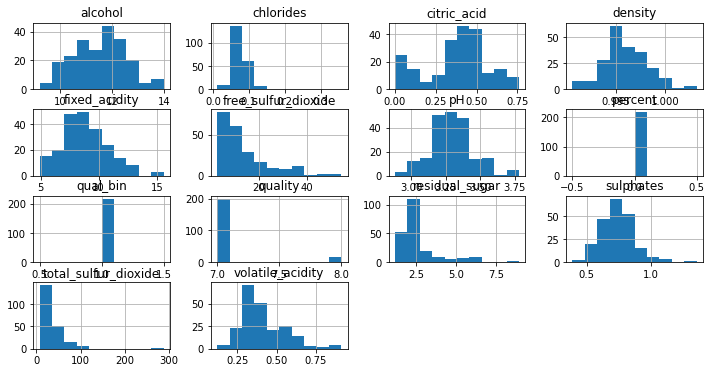

In [74]:
white_hiQual.hist(figsize=(12, 6))
red_hiQual.hist(figsize=(12, 6))